In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [27]:
data = pd.read_csv('plotting_data', index_col = [0])
data.head()

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
0,2016,2,1,3,1,1,0.0,1.0,0.0,1,...,7,3,1.0,0.0,0.0,1,0,1.0,5,0
1,2016,2,1,0,0,1,0.0,1.0,0.0,0,...,10,1,0.0,1.0,0.0,0,0,0.0,13,1
2,2016,2,1,1,0,3,1.0,0.0,0.0,1,...,4,1,0.0,1.0,0.0,0,0,0.0,9,0
3,2016,2,1,3,0,3,1.0,0.0,0.0,2,...,2,1,0.0,1.0,0.0,0,0,0.0,11,0
4,2016,2,1,5,0,1,0.0,1.0,0.0,0,...,12,1,0.0,1.0,0.0,1,1,0.0,6,0


In [28]:
data['match_winner'].astype(str)

0       0
1       1
2       0
3       0
4       0
       ..
4657    0
4658    0
4659    2
4660    1
4661    0
Name: match_winner, Length: 4662, dtype: object

In [29]:
data

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
0,2016,2,1,3,1,1,0.0,1.0,0.0,1,...,7,3,1.0,0.0,0.0,1,0,1.0,5,0
1,2016,2,1,0,0,1,0.0,1.0,0.0,0,...,10,1,0.0,1.0,0.0,0,0,0.0,13,1
2,2016,2,1,1,0,3,1.0,0.0,0.0,1,...,4,1,0.0,1.0,0.0,0,0,0.0,9,0
3,2016,2,1,3,0,3,1.0,0.0,0.0,2,...,2,1,0.0,1.0,0.0,0,0,0.0,11,0
4,2016,2,1,5,0,1,0.0,1.0,0.0,0,...,12,1,0.0,1.0,0.0,1,1,0.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,2021,38,2,2,1,44,9.0,17.0,11.0,38,...,14,40,9.0,13.0,15.0,35,42,-7.0,19,0
4658,2021,38,2,1,0,39,9.0,12.0,16.0,36,...,20,41,11.0,8.0,18.0,35,43,-8.0,18,0
4659,2021,38,2,1,4,41,10.0,11.0,16.0,25,...,17,58,16.0,10.0,11.0,39,34,5.0,6,2
4660,2021,38,2,1,1,57,16.0,9.0,12.0,43,...,7,62,18.0,8.0,11.0,41,31,10.0,4,1


It is important to drop the columns referred to the goals from the match in order to do not give that infromation to the model.

In [30]:
data = data.drop(['local_goals', 'visitor_goals'], axis=1)

## Modelling

We start with models based on this data before performing feature engineering. We will observe which classifiers obtain the best prediction values, and based on them, we will have a base prediction result that we will try to improve.

In [32]:
#### Orden Cosas #

#-> Separar en train test split lo primero
#-> Hacer mix_max_scaler para X_train solo
#-> Entrenar con X_train y y_train
#-> Usar min_max_scaler con X_test
#-> Predecir con X_test para tener predictions y comparar con y_test


#### Logistic Regression

In [35]:
features = data.values[:, :-1]
target = data.values[:, -1]
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(max_iter = 500)
model.fit(X_train_scaled, y_train)

#predictions_lr = model.predict(X_test)

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

np.mean(y_pred == y_test)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5074946466809421

In [43]:
target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions_lr, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.00      0.00      0.00       218
        Empate       0.00      0.00      0.00       131
Gana Visitante       0.25      1.00      0.40       118

      accuracy                           0.25       467
     macro avg       0.08      0.33      0.13       467
  weighted avg       0.06      0.25      0.10       467



### Decision Tree

In [20]:
features = data.values[:, :-1]
target = data.values[:, -1]
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)


predictions_dt = model.predict(X_test)

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

np.mean(y_pred == y_test)

0.37044967880085655

In [21]:
confusion_matrix(y_test, predictions_dt)

array([[ 43,  48, 127],
       [ 24,  30,  77],
       [ 24,  44,  50]], dtype=int64)

In [22]:
target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions_dt, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.47      0.20      0.28       218
        Empate       0.25      0.23      0.24       131
Gana Visitante       0.20      0.42      0.27       118

      accuracy                           0.26       467
     macro avg       0.31      0.28      0.26       467
  weighted avg       0.34      0.26      0.26       467



filas = [precision, 
columnas = 

### Random Forest

In [25]:
features = data.values[:, :-1]
target = data.values[:, -1]
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)


predictions_rf = model.predict(X_test)

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

np.mean(y_pred == y_test)

0.4689507494646681

In [19]:
target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions_rf, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.00      0.00      0.00       218
        Empate       0.00      0.00      0.00       131
Gana Visitante       0.25      1.00      0.40       118

      accuracy                           0.25       467
     macro avg       0.08      0.33      0.13       467
  weighted avg       0.06      0.25      0.10       467



### KNeighbors

In [145]:
from sklearn.neighbors import KNeighborsClassifier
features = data.values[:, :-1]
target = data.values[:, -1]
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model =KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

np.mean(y_pred == y_test)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.45610278372591007

In [146]:
target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.50      0.88      0.64       218
        Empate       0.38      0.04      0.07       131
Gana Visitante       0.51      0.31      0.38       118

      accuracy                           0.50       467
     macro avg       0.46      0.41      0.36       467
  weighted avg       0.47      0.50      0.41       467



In [ ]:

values = X_train.values[:, :-1]
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(values)
df_xtrain = DataFrame(X_train_scaled)
df_datascaled = pd.concat([df_datascaled, pd.DataFrame(data['match_winner'])], axis=1)
print(df_datascaled.describe())

finaldatavalues = df_datascaled.values
features = finaldatavalues[:, :-1]
target = finaldatavalues[:, -1]
X, y = features, target
X = X.astype('float32')
y = y.astype('int')

####




lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c= predictions)

np.mean(predictions == y_test )



In [60]:
features = data[:, :-1]
target = data[:, -1]

X, y = features, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

In [56]:
features = data[:, :-1].values
target = data[:, -1].values
X, y = features, target
X = X.astype('float32')
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)
values = X_train.values[:, :-1]
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [53]:
X_train

array([[0.3999939 , 0.30555555, 0.        , ..., 0.3027523 , 0.04494382,
        0.6076923 ],
       [0.7999878 , 0.30555555, 0.        , ..., 0.2293578 , 0.17977528,
        0.45384616],
       [0.6000061 , 0.9444444 , 1.        , ..., 0.3119266 , 0.40449437,
        0.36923078],
       ...,
       [0.3999939 , 0.75      , 1.        , ..., 0.3027523 , 0.58426964,
        0.23846154],
       [0.3999939 , 0.05555556, 1.        , ..., 0.        , 0.03370786,
        0.36153847],
       [0.3999939 , 0.9166666 , 1.        , ..., 0.3119266 , 0.43820226,
        0.34615386]], dtype=float32)

In [122]:
values = data.values[:, :-1]
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(values)
df_datascaled = DataFrame(data_scaled)
df_datascaled = pd.concat([df_datascaled, pd.DataFrame(data['match_winner'])], axis=1)
print(df_datascaled.describe())

                 0            1            2            3            4  \
count  4662.000000  4662.000000  4662.000000  4662.000000  4662.000000   
mean      0.499998     0.500000     0.523810     0.283113     0.246024   
std       0.341603     0.296617     0.499489     0.187544     0.181150   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.199982     0.250000     0.000000     0.133333     0.111111   
50%       0.500000     0.500000     1.000000     0.255556     0.222222   
75%       0.799988     0.750000     1.000000     0.411111     0.333333   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  4662.000000  4662.000000  4662.000000  4662.000000  4662.000000   
mean      0.295468     0.249758     0.204321     0.262372     0.396837   
std       0.197789     0.178347     0.137371     0.169110     0.096066   
min       0.000000     0.000000     0

In [137]:
df_datascaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,match_winner
0,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.0,0.008929,0.011364,0.398438,0.285714,0.033333,0.035714,0.00,0.0,0.009174,0.000000,0.392308,0.190476,0
1,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.0,0.000000,0.000000,0.398438,0.428571,0.011111,0.000000,0.05,0.0,0.000000,0.000000,0.384615,0.571429,1
2,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.0,0.008929,0.000000,0.406250,0.142857,0.011111,0.000000,0.05,0.0,0.000000,0.000000,0.384615,0.380952,0
3,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.0,0.017857,0.011364,0.406250,0.047619,0.011111,0.000000,0.05,0.0,0.000000,0.000000,0.384615,0.476191,0
4,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.0,0.000000,0.000000,0.398438,0.523810,0.011111,0.000000,0.05,0.0,0.009174,0.011236,0.384615,0.238095,0


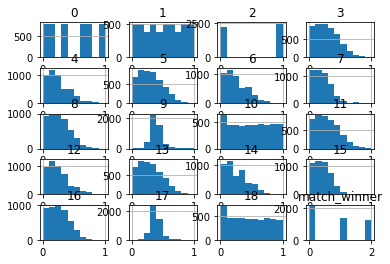

In [124]:
df_datascaled.hist()
plt.show()

In [125]:
df_datascaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,match_winner
0,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.008929,0.011364,0.398438,0.285714,0.033333,0.035714,0.00,0.000000,0.009174,0.000000,0.392308,0.190476,0
1,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.000000,0.000000,0.398438,0.428571,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.571429,1
2,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.000000,0.008929,0.000000,0.406250,0.142857,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.380952,0
3,0.0,0.0,0.0,0.033333,0.037037,0.000000,0.000000,0.017857,0.011364,0.406250,0.047619,0.011111,0.000000,0.05,0.000000,0.000000,0.000000,0.384615,0.476191,0
4,0.0,0.0,0.0,0.011111,0.000000,0.052632,0.000000,0.000000,0.000000,0.398438,0.523810,0.011111,0.000000,0.05,0.000000,0.009174,0.011236,0.384615,0.238095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,1.0,1.0,1.0,0.488889,0.333333,0.894737,0.407407,0.339286,0.431818,0.398438,0.619048,0.444444,0.321429,0.65,0.576923,0.321101,0.471910,0.330769,0.857143,0
4658,1.0,1.0,1.0,0.433333,0.333333,0.631579,0.592593,0.321429,0.534091,0.312500,0.904762,0.455556,0.392857,0.40,0.692308,0.321101,0.483146,0.323077,0.809524,0
4659,1.0,1.0,1.0,0.455556,0.370370,0.578947,0.592593,0.223214,0.488636,0.257812,0.761905,0.644444,0.571429,0.50,0.423077,0.357798,0.382022,0.423077,0.238095,2
4660,1.0,1.0,1.0,0.633333,0.592593,0.473684,0.444444,0.383929,0.409091,0.453125,0.285714,0.688889,0.642857,0.40,0.423077,0.376147,0.348315,0.461538,0.142857,1


In [126]:
features.shape

(4662, 19)

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5203426124197003

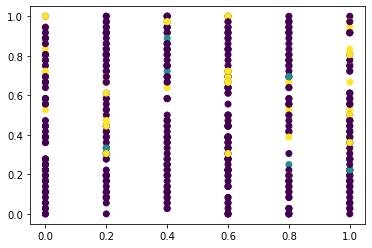

In [127]:
finaldatavalues = df_datascaled.values
features = finaldatavalues[:, :-1]
target = finaldatavalues[:, -1]
X, y = features, target
X = X.astype('float32')
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)



lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c= predictions)

np.mean(predictions == y_test )



C:\Users\pablo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5203426124197003

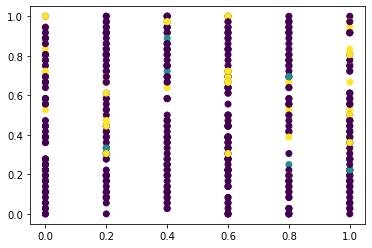

In [128]:
finaldatavalues = df_datascaled.values
features = finaldatavalues[:, :-1]
target = finaldatavalues[:, -1]
X, y = features, target
X = X.astype('float32')
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=40)



lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1],c= predictions)

np.mean(predictions == y_test )



In [129]:
df_datascaled['match_winner'].value_counts()

0    2097
1    1343
2    1222
Name: match_winner, dtype: int64

In [130]:
from sklearn.metrics import classification_report


target_names = ['Gana Local', 'Empate', 'Gana Visitante']
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

    Gana Local       0.52      0.94      0.67       220
        Empate       0.36      0.04      0.07       134
Gana Visitante       0.57      0.28      0.38       113

      accuracy                           0.52       467
     macro avg       0.48      0.42      0.37       467
  weighted avg       0.49      0.52      0.43       467

